# XOR data set

In [2]:
import tensorflow as tf
import numpy as np

## XOR - logistic classification not work!

In [3]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_data = np.array([[0], [1], [1], [0]])

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# hypothersis - sigmoid function
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
# cost
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
# minimize cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# measure
predicted = tf.cast(hypothesis>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step%100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print('\nhypothesis: ', h, '\nCorrect: ', c, "\nAccuracy: ", a)

0 0.722517 [[-0.30061924]
 [-0.54001516]]
100 0.695497 [[-0.11545846]
 [-0.24372067]]
200 0.694173 [[-0.0851723 ]
 [-0.15370704]]
300 0.693602 [[-0.06230986]
 [-0.09892526]]
400 0.693351 [[-0.04464281]
 [-0.06420389]]
500 0.693239 [[-0.03151189]
 [-0.0419618 ]]
600 0.693189 [[-0.02200573]
 [-0.02758822]]
700 0.693166 [[-0.01524624]
 [-0.01822848]]
800 0.693156 [[-0.01050063]
 [-0.01209378]]
900 0.693151 [[-0.00719969]
 [-0.00805078]]
1000 0.693149 [[-0.00491943]
 [-0.00537408]]
1100 0.693148 [[-0.00335243]
 [-0.00359533]]
1200 0.693148 [[-0.00227989]
 [-0.00240962]]
1300 0.693147 [[-0.00154797]
 [-0.00161728]]
1400 0.693147 [[-0.00104971]
 [-0.00108675]]
1500 0.693147 [[-0.00071114]
 [-0.00073092]]
1600 0.693147 [[-0.0004814 ]
 [-0.00049197]]
1700 0.693147 [[-0.00032568]
 [-0.00033133]]
1800 0.693147 [[-0.00022025]
 [-0.00022326]]
1900 0.693147 [[-0.00014887]
 [-0.00015048]]
2000 0.693147 [[-0.00010059]
 [-0.00010145]]
2100 0.693147 [[ -6.79479563e-05]
 [ -6.84101542e-05]]
2200 0.69314

logical reg not work! (하나의 레이어로 학습시킬 수 없음) => NN 사용!

## Neural Network 적용

In [7]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# layer1
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# layer2 - hypothesis
W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))

# minimize cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# measure
predicted = tf.cast(hypothesis>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step%100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print('\nhypothesis: ', h, '\nCorrect: ', c, "\nAccuracy: ", a)

0 0.702684 [array([[ 0.12610793, -0.66093636],
       [-0.75371438,  1.69425225]], dtype=float32), array([[ 1.20212662],
       [-0.02499753]], dtype=float32)]
100 0.694123 [array([[ 0.10145222, -0.66413182],
       [-0.73893785,  1.70031166]], dtype=float32), array([[ 1.10796106],
       [-0.12011737]], dtype=float32)]
200 0.693905 [array([[ 0.098561  , -0.66982454],
       [-0.70522463,  1.70713913]], dtype=float32), array([[ 1.08659053],
       [-0.12861429]], dtype=float32)]
300 0.693693 [array([[ 0.09542122, -0.67632568],
       [-0.67241949,  1.7146765 ]], dtype=float32), array([[ 1.06860709],
       [-0.13968122]], dtype=float32)]
400 0.693475 [array([[ 0.09172545, -0.6838398 ],
       [-0.64031684,  1.72314036]], dtype=float32), array([[ 1.05283713],
       [-0.15412711]], dtype=float32)]
500 0.693243 [array([[ 0.08741992, -0.69263166],
       [-0.60853994,  1.73274779]], dtype=float32), array([[ 1.03902638],
       [-0.1717989 ]], dtype=float32)]
600 0.692987 [array([[ 0.08245

5300 0.0611414 [array([[-4.66177845, -5.47404861],
       [ 4.37245893,  5.64074421]], dtype=float32), array([[ 7.40107393],
       [-6.82939911]], dtype=float32)]
5400 0.0578837 [array([[-4.71554184, -5.51126146],
       [ 4.42694712,  5.67660189]], dtype=float32), array([[ 7.50756788],
       [-6.92682314]], dtype=float32)]
5500 0.0549361 [array([[-4.76609039, -5.54649973],
       [ 4.47816133,  5.71074295]], dtype=float32), array([[ 7.60886431],
       [-7.02009964]], dtype=float32)]
5600 0.052258 [array([[-4.81374407, -5.57994366],
       [ 4.52643013,  5.74330807]], dtype=float32), array([[ 7.70541573],
       [-7.1095438 ]], dtype=float32)]
5700 0.0498152 [array([[-4.85878372, -5.61175013],
       [ 4.57204008,  5.77441978]], dtype=float32), array([[ 7.79762363],
       [-7.195436  ]], dtype=float32)]
5800 0.0475791 [array([[-4.90145063, -5.64206028],
       [ 4.61523962,  5.80418921]], dtype=float32), array([[ 7.88584661],
       [-7.2780304 ]], dtype=float32)]
5900 0.0455254 [a

# Wide NN for XOR

In [8]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# layer1
W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# layer2 - hypothesis
W2 = tf.Variable(tf.random_normal([10, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))

# minimize cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# measure
predicted = tf.cast(hypothesis>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step%100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print('\nhypothesis: ', h, '\nCorrect: ', c, "\nAccuracy: ", a)

0 1.33694 [array([[-0.14447369,  0.76033157,  0.63554347,  0.15347859, -0.04313168,
        -0.28207859,  0.15917374,  0.15116732, -0.30834797, -1.55409384],
       [ 0.13457075,  0.25033149,  0.25811779, -0.30530986, -1.74466383,
        -1.4288801 , -1.46141958,  0.88869214, -0.01220166, -1.21918893]], dtype=float32), array([[ 1.48755848],
       [ 2.15064025],
       [-0.41646311],
       [ 1.18131721],
       [-0.84228557],
       [-0.57436794],
       [ 0.7772705 ],
       [ 1.5403589 ],
       [-1.26766694],
       [ 0.17859568]], dtype=float32)]
100 0.685639 [array([[-0.26564166,  0.54847807,  0.68144935,  0.03901801, -0.15161976,
        -0.33514333,  0.12917285, -0.08711064, -0.16261727, -1.55603254],
       [ 0.03217502, -0.10027578,  0.30930981, -0.43070355, -1.69773817,
        -1.39998817, -1.53160667,  0.73993832,  0.2041405 , -1.22135746]], dtype=float32), array([[ 1.30790901],
       [ 1.91842186],
       [-0.82741129],
       [ 0.8035453 ],
       [-0.99154854],
      

1500 0.230533 [array([[-1.57690561,  2.33627868,  1.15574884, -0.48672628, -2.30517888,
        -1.97317827,  0.40153807, -2.98988247, -0.2802065 , -2.36259675],
       [ 0.90581435, -3.03209972,  0.35096803, -0.71422011, -2.70518398,
        -2.34010959, -2.07122803,  2.5212059 ,  1.13464034, -2.30394602]], dtype=float32), array([[ 1.93259752],
       [ 3.55698586],
       [-1.56585348],
       [ 1.11100483],
       [-2.53921485],
       [-1.96755373],
       [ 1.2691704 ],
       [ 3.42688251],
       [-2.06956053],
       [-2.03994465]], dtype=float32)]
1600 0.198634 [array([[-1.68655598,  2.47425413,  1.19510531, -0.51287216, -2.39601827,
        -2.046839  ,  0.42832908, -3.19020367, -0.31791642, -2.42174816],
       [ 0.97642499, -3.22222948,  0.36981583, -0.73683363, -2.77126789,
        -2.39472604, -2.12228441,  2.64933181,  1.21083295, -2.37000632]], dtype=float32), array([[ 2.00734687],
       [ 3.76476908],
       [-1.64016938],
       [ 1.13630676],
       [-2.64203334],
 

3000 0.0472216 [array([[-2.58932567,  3.43029141,  1.49920332, -0.69474685, -3.02090096,
        -2.55276775,  0.704575  , -4.52354336, -0.74847662, -2.86262155],
       [ 1.58808124, -4.50442076,  0.53660083, -0.90417546, -3.26011896,
        -2.79187703, -2.57238936,  3.56018901,  1.91623998, -2.84466314]], dtype=float32), array([[ 2.76020503],
       [ 5.50352669],
       [-2.2763443 ],
       [ 1.3588388 ],
       [-3.39862084],
       [-2.61405039],
       [ 1.86630499],
       [ 5.51804638],
       [-2.76057887],
       [-2.77937794]], dtype=float32)]
3100 0.0441902 [array([[-2.62683749,  3.46429348,  1.51155198, -0.70171076, -3.04339242,
        -2.57109213,  0.71805656, -4.5690403 , -0.77028215, -2.87948585],
       [ 1.6144886 , -4.54840612,  0.5443669 , -0.91042715, -3.27889323,
        -2.8070941 , -2.59213805,  3.59344363,  1.94863248, -2.86257172]], dtype=float32), array([[ 2.79689097],
       [ 5.57442999],
       [-2.3040216 ],
       [ 1.36876535],
       [-3.42759705],

4500 0.0220925 [array([[-3.00249338,  3.78653574,  1.63639629, -0.77188879, -3.25860715,
        -2.74750662,  0.86192608, -4.99438524, -1.00304151, -3.04408002],
       [ 1.88296211, -4.95892572,  0.62968022, -0.97035915, -3.46299601,
        -2.95701885, -2.79462361,  3.91197777,  2.28566098, -3.03766346]], dtype=float32), array([[ 3.18928361],
       [ 6.27591896],
       [-2.58993077],
       [ 1.47238386],
       [-3.71210051],
       [-2.85071898],
       [ 2.13335705],
       [ 6.34608269],
       [-3.11580443],
       [-3.04577875]], dtype=float32)]
4600 0.021272 [array([[-3.02217746,  3.80260229,  1.64303577, -0.77563435, -3.26944876,
        -2.75645304,  0.86991888, -5.01533794, -1.01592386, -3.05252337],
       [ 1.89723527, -4.97909689,  0.63461894, -0.97337598, -3.47248745,
        -2.96479344, -2.80547881,  3.92802739,  2.30391908, -3.04667306]], dtype=float32), array([[ 3.21112967],
       [ 6.31228876],
       [-2.60542846],
       [ 1.47805345],
       [-3.72679639],


6000 0.0137497 [array([[-3.24325728,  3.97829676,  1.71865988, -0.8186276 , -3.3887887 ,
        -2.85539293,  0.96290296, -5.2431078 , -1.16498446, -3.14641762],
       [ 2.05901217, -5.19786453,  0.6942848 , -1.00652409, -3.57837415,
        -3.05190706, -2.9291811 ,  4.10465813,  2.51263595, -3.14715934]], dtype=float32), array([[ 3.46563721],
       [ 6.71866179],
       [-2.78391767],
       [ 1.54370177],
       [-3.8910358 ],
       [-2.98669195],
       [ 2.29765201],
       [ 6.8273654 ],
       [-3.34493232],
       [-3.19798493]], dtype=float32)]
6100 0.0133968 [array([[-3.25608921,  3.9882431 ,  1.72311831, -0.8211866 , -3.39559054,
        -2.86105895,  0.96848387, -5.25593376, -1.17387605, -3.15182066],
       [ 2.06848764, -5.21015358,  0.69801015, -1.00840938, -3.5844872 ,
        -3.05695963, -2.93646383,  4.11472082,  2.52494478, -3.15296102]], dtype=float32), array([[ 3.48093462],
       [ 6.74214363],
       [-2.7945509 ],
       [ 1.54763198],
       [-3.90053582],

7500 0.00977301 [array([[-3.40883398,  4.10472488,  1.7769016 , -0.85233241, -3.475631  ,
        -2.92797065,  1.03649926, -5.40566111, -1.28165293, -3.21582913],
       [ 2.18202901, -5.35332727,  0.74490637, -1.03056359, -3.65707493,
        -3.1171639 , -3.0240519 ,  4.23310041,  2.67292523, -3.22185969]], dtype=float32), array([[ 3.667588  ],
       [ 7.0209589 ],
       [-2.9237628 ],
       [ 1.59554291],
       [-4.01350307],
       [-3.08022857],
       [ 2.41506147],
       [ 7.15977764],
       [-3.5126493 ],
       [-3.30234218]], dtype=float32)]
7600 0.0095827 [array([[-3.41817975,  4.11174154,  1.78023887, -0.85428339, -3.48047614,
        -2.93203568,  1.0407567 , -5.41465473, -1.2883606 , -3.21972871],
       [ 2.18902206, -5.36190987,  0.74793839, -1.03190243, -3.66150737,
        -3.12085414, -3.02946568,  4.24026442,  2.68206239, -3.2260685 ]], dtype=float32), array([[ 3.67928457],
       [ 7.03798103],
       [-2.93183613],
       [ 1.59854555],
       [-4.02041292]

9000 0.00749328 [array([[-3.53331685,  4.19721985,  1.82185173, -0.87881202, -3.53972387,
        -2.98188472,  1.09412611, -5.52400827, -1.37203944, -3.26764035],
       [ 2.27562451, -5.46608686,  0.78697723, -1.04826367, -3.7160666 ,
        -3.16640162, -3.09668756,  4.32783747,  2.79534411, -3.2778945 ]], dtype=float32), array([[ 3.82606983],
       [ 7.2474184 ],
       [-3.03304172],
       [ 1.6362654 ],
       [-4.1055603 ],
       [-3.15082073],
       [ 2.5059607 ],
       [ 7.41115665],
       [-3.64440084],
       [-3.38091445]], dtype=float32)]
9100 0.00737608 [array([[-3.54058886,  4.20255995,  1.82451284, -0.88039392, -3.5434401 ,
        -2.98501945,  1.09755397, -5.530828  , -1.37738812, -3.27065873],
       [ 2.28112221, -5.4725728 ,  0.78955197, -1.04928899, -3.71950984,
        -3.16928458, -3.10096598,  4.33332825,  2.80254102, -3.28116679]], dtype=float32), array([[ 3.83550858],
       [ 7.26063108],
       [-3.03954601],
       [ 1.63869524],
       [-4.11094046

# Deep NN for XOR

In [3]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# layer1
W1 = tf.Variable(tf.random_normal([2, 100]), name='weight1')
b1 = tf.Variable(tf.random_normal([100]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# layer2
W2 = tf.Variable(tf.random_normal([100, 100]), name='weight2')
b2 = tf.Variable(tf.random_normal([100]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# layer3
W3 = tf.Variable(tf.random_normal([100, 100]), name='weight3')
b3 = tf.Variable(tf.random_normal([100]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

# layer4
W4 = tf.Variable(tf.random_normal([100, 10]), name='weight4')
b4 = tf.Variable(tf.random_normal([10]), name='bias4')
hypothesis = tf.nn.softmax(tf.matmul(layer3, W4) + b4)

# cost
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))

# minimize cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# measure
predicted = tf.cast(hypothesis>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step%100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print('\nhypothesis: ', h, '\nCorrect: ', c, "\nAccuracy: ", a)

0 2.69458 [array([[ 0.23603517, -0.23685952, -0.72491604, -0.25151801, -0.60001075,
         0.99805194, -1.68244445,  1.55466104,  1.50456178,  0.3740873 ,
        -0.25351477, -0.07957934, -0.3908245 , -0.3587752 , -0.63060313,
        -1.10502636,  1.94895089, -0.69702268, -0.93131614, -0.69349784,
        -0.28912869,  0.89764965, -1.40918148,  0.14664111,  0.15970495,
         0.38653362,  0.34890807,  0.02473263, -0.80434299, -0.55660975,
         0.90538073, -0.91935742,  0.11780478,  0.17780505, -2.01938748,
         2.24907041,  1.3547858 ,  0.25466344,  0.61567563,  0.32323855,
         0.25792402, -0.81411332, -0.96504962,  0.48852175, -0.10157614,
        -0.38201743,  1.67316735, -1.54333401, -0.85082191, -0.26848754,
         2.27390552, -0.93740898, -1.05387878,  0.23766634, -0.3864561 ,
        -0.20138274, -1.58884859, -0.05722375, -0.96941853, -1.15009761,
         1.22705948, -2.04489088,  0.9733308 ,  0.29484555, -0.73771274,
         0.44970521,  0.35529929, -2.557

300 1.20467 [array([[ 0.20615797, -0.23576868, -0.73668528, -0.26218149, -0.61725068,
         0.98528445, -1.67579925,  1.54060268,  1.52171099,  0.36967531,
        -0.23458698, -0.06589644, -0.39153844, -0.35804769, -0.61955243,
        -1.12925053,  1.94101965, -0.70475429, -0.93329692, -0.6833452 ,
        -0.26916966,  0.9065305 , -1.42108071,  0.13932359,  0.15528055,
         0.42124563,  0.34821695,  0.03596077, -0.80981517, -0.54833007,
         0.89385414, -0.86155498,  0.08523063,  0.1576366 , -1.99842882,
         2.2364881 ,  1.3336333 ,  0.22786531,  0.60107571,  0.35242197,
         0.2876322 , -0.82664335, -0.94878787,  0.46113846, -0.09438782,
        -0.40615413,  1.66640306, -1.53515315, -0.82460535, -0.26638412,
         2.2923255 , -0.93556416, -1.06938255,  0.25144652, -0.38555095,
        -0.19720654, -1.58016312, -0.09059252, -0.99744749, -1.16618848,
         1.24144983, -2.0405972 ,  0.95645797,  0.27945074, -0.73005784,
         0.52921188,  0.34450448, -2.5

600 1.20456 [array([[ 0.2076024 , -0.23486143, -0.73556322, -0.26201376, -0.6172666 ,
         0.98622853, -1.67674387,  1.5416472 ,  1.52123058,  0.36822915,
        -0.23516214, -0.06742295, -0.39134854, -0.35729933, -0.61928093,
        -1.12854028,  1.94128799, -0.7037344 , -0.93318146, -0.68199044,
        -0.26780453,  0.90573978, -1.42145407,  0.13940667,  0.15513696,
         0.42207468,  0.34871042,  0.03597734, -0.81018078, -0.5479964 ,
         0.89268667, -0.86108136,  0.08763088,  0.15886058, -1.99844241,
         2.23709965,  1.33352637,  0.22841176,  0.60081238,  0.35223481,
         0.28733906, -0.82612342, -0.94927365,  0.45971346, -0.09403923,
        -0.40570182,  1.66598117, -1.53582788, -0.82599854, -0.26679355,
         2.29236913, -0.93578845, -1.06983948,  0.2511467 , -0.38574222,
        -0.19805458, -1.57915235, -0.09018411, -0.99710423, -1.16572201,
         1.2403183 , -2.04123116,  0.95650321,  0.27988929, -0.73089159,
         0.52861381,  0.34448153, -2.5

900 1.20451 [array([[ 0.20845701, -0.23433067, -0.73460048, -0.26169062, -0.61718339,
         0.98710799, -1.67727768,  1.54217541,  1.52117598,  0.36717251,
        -0.23545556, -0.06857685, -0.39130691, -0.3567915 , -0.61921221,
        -1.12797272,  1.94152105, -0.70315051, -0.93312234, -0.68125707,
        -0.26706314,  0.90534788, -1.4215126 ,  0.13964488,  0.1550407 ,
         0.42236128,  0.34892473,  0.03599182, -0.8104226 , -0.54765743,
         0.89183313, -0.86125809,  0.08964993,  0.1595695 , -1.99836397,
         2.23750949,  1.33345509,  0.22885138,  0.60077226,  0.35228398,
         0.2873494 , -0.82571584, -0.94959652,  0.45905736, -0.0937453 ,
        -0.40533412,  1.66578901, -1.53611374, -0.82660097, -0.26716241,
         2.29235387, -0.93571991, -1.0700779 ,  0.25101733, -0.3857953 ,
        -0.19881496, -1.57843006, -0.08980078, -0.9968226 , -1.16533196,
         1.23948359, -2.04180336,  0.95655453,  0.28013605, -0.73134077,
         0.5281471 ,  0.3445746 , -2.5

1200 1.20448 [array([[ 0.2089133 , -0.23401612, -0.73375392, -0.26128531, -0.61707246,
         0.98791426, -1.67755175,  1.54243648,  1.52136648,  0.3663986 ,
        -0.2355362 , -0.06952554, -0.39133918, -0.35641614, -0.61925876,
        -1.12749135,  1.94173563, -0.70277154, -0.93309277, -0.68084949,
        -0.26670662,  0.9052248 , -1.4214375 ,  0.13991976,  0.15497603,
         0.42239645,  0.34899771,  0.03597239, -0.81055146, -0.54734129,
         0.89111608, -0.86174327,  0.09137297,  0.15998961, -1.99823523,
         2.23783255,  1.33338356,  0.22927925,  0.60088116,  0.35245365,
         0.28749368, -0.82542574, -0.94986403,  0.45875543, -0.09351604,
        -0.4050563 ,  1.66576481, -1.5362016 , -0.82682258, -0.2674495 ,
         2.29228234, -0.93550915, -1.07023776,  0.25100017, -0.38577768,
        -0.19948603, -1.5778023 , -0.08941171, -0.99655515, -1.16488194,
         1.23879135, -2.04237556,  0.95663649,  0.28031126, -0.7316404 ,
         0.52774489,  0.34469646, -2.

1500 1.20446 [array([[ 0.20911096, -0.23382105, -0.73300475, -0.26083913, -0.61696512,
         0.98866898, -1.67764044,  1.54254758,  1.52170241,  0.36581182,
        -0.23546924, -0.07035358, -0.39141083, -0.3561168 , -0.61937213,
        -1.12705982,  1.9419502 , -0.70251554, -0.9330802 , -0.68062443,
        -0.26659134,  0.90526664, -1.42128146,  0.14021181,  0.15492955,
         0.42227104,  0.34899354,  0.03591904, -0.81059998, -0.54704964,
         0.89047015, -0.86238045,  0.09289582,  0.16023493, -1.99806881,
         2.23811865,  1.33331203,  0.22970827,  0.60104477,  0.35268751,
         0.28773069, -0.82520705, -0.95008677,  0.45864597, -0.09332659,
        -0.40483552,  1.66583169, -1.53617036, -0.82682228, -0.26767969,
         2.29221082, -0.93522823, -1.07036388,  0.25105035, -0.38572115,
        -0.20009056, -1.57724142, -0.08902078, -0.99628651, -1.16436887,
         1.23819721, -2.04291415,  0.95673573,  0.28045857, -0.7318458 ,
         0.52739853,  0.34484118, -2.

1800 1.20444 [array([[ 0.20914009, -0.23369215, -0.73232657, -0.26038316, -0.61686409,
         0.98938394, -1.67759931,  1.5425694 ,  1.52212584,  0.36534977,
        -0.23531021, -0.0711123 , -0.39150879, -0.35586753, -0.61952478,
        -1.12667239,  1.94212961, -0.70233369, -0.9330802 , -0.68050236,
        -0.26662937,  0.90541297, -1.42107689,  0.14051798,  0.15489396,
         0.42205036,  0.34894386,  0.03584017, -0.81059664, -0.54677701,
         0.88985646, -0.86309791,  0.09428787,  0.16037327, -1.99787331,
         2.23835802,  1.33324051,  0.23012424,  0.60122359,  0.35296369,
         0.28803486, -0.82504356, -0.9502669 ,  0.45864555, -0.09316329,
        -0.40465102,  1.66595769, -1.53607416, -0.82668447, -0.267878  ,
         2.29213929, -0.93491042, -1.07047117,  0.2511439 , -0.38563836,
        -0.2006451 , -1.57672203, -0.08863051, -0.99601823, -1.1637975 ,
         1.23767996, -2.04341483,  0.95684814,  0.28060162, -0.7319997 ,
         0.52710462,  0.34500378, -2.

2100 1.20442 [array([[ 0.20905954, -0.23359889, -0.73169905, -0.2599335 , -0.61677468,
         0.99006361, -1.67746949,  1.54254103,  1.52260542,  0.36497143,
        -0.23509978, -0.07183424, -0.39162228, -0.35565516, -0.6196996 ,
        -1.12632477,  1.94230843, -0.70219713, -0.93308473, -0.68043637,
        -0.26676577,  0.90562862, -1.42083669,  0.14083913,  0.15486509,
         0.42177737,  0.34886721,  0.03574413, -0.8105635 , -0.54651499,
         0.88924849, -0.86386406,  0.09559918,  0.1604469 , -1.99765587,
         2.2385726 ,  1.33316898,  0.23051234,  0.60138726,  0.3532725 ,
         0.28838676, -0.8249256 , -0.95040762,  0.4587096 , -0.09301652,
        -0.40448859,  1.66612601, -1.53593433, -0.82645798, -0.26806575,
         2.29206777, -0.93456852, -1.07057846,  0.25126663, -0.38553533,
        -0.20116226, -1.57622838, -0.08824308, -0.99577308, -1.16316795,
         1.23722672, -2.04391551,  0.95697331,  0.28075096, -0.7321291 ,
         0.52685815,  0.34517983, -2.

2400 1.20441 [array([[ 0.20890674, -0.23352335, -0.73110658, -0.25950187, -0.61670023,
         0.99071282, -1.67727625,  1.54247952,  1.52310979,  0.36464924,
        -0.23486368, -0.07253779, -0.39174587, -0.35547182, -0.61987919,
        -1.12601388,  1.94248724, -0.70208484, -0.93310261, -0.68039858,
        -0.26696527,  0.90589142, -1.4205848 ,  0.14117639,  0.15484098,
         0.42147827,  0.34877333,  0.03563602, -0.81051046, -0.54626465,
         0.88864052, -0.8646605 ,  0.09685961,  0.16048138, -1.99740553,
         2.23878717,  1.33309174,  0.23086615,  0.60153353,  0.35361072,
         0.28877455, -0.82485032, -0.95051181,  0.45881292, -0.09288124,
        -0.40434003,  1.666327  , -1.53577614, -0.82617098, -0.26825356,
         2.29199624, -0.9342109 , -1.07068574,  0.25140905, -0.38541648,
        -0.20165052, -1.57576346, -0.08786034, -0.99555761, -1.16248035,
         1.23682201, -2.04435182,  0.95711321,  0.28091171, -0.73225427,
         0.52665663,  0.34536859, -2.

2700 1.20439 [array([[ 0.20870668, -0.23345487, -0.7305426 , -0.25909224, -0.61663753,
         0.99133164, -1.67704189,  1.54240799,  1.52364624,  0.36436638,
        -0.23461883, -0.07323441, -0.39187104, -0.35531238, -0.62007588,
        -1.12573886,  1.94266605, -0.70197755, -0.93312049, -0.68036753,
        -0.26720449,  0.90618622, -1.4202987 ,  0.14152871,  0.15481949,
         0.42117223,  0.34866849,  0.03551885, -0.81045681, -0.54601431,
         0.88802058, -0.86548036,  0.09809002,  0.16049288, -1.99714375,
         2.23900175,  1.33298445,  0.23118448,  0.60165387,  0.3539753 ,
         0.28918684, -0.82481533, -0.95058495,  0.4589408 , -0.09275459,
        -0.40419853,  1.66654563, -1.53559732, -0.82584298, -0.26844987,
         2.29192472, -0.93384403, -1.07079303,  0.25156599, -0.385288  ,
        -0.2021157 , -1.5753051 , -0.08748262, -0.99537832, -1.16174376,
         1.23646271, -2.04478097,  0.9572624 ,  0.28108615, -0.73239583,
         0.52648956,  0.345566  , -2.

3000 1.20438 [array([[ 0.20847385, -0.23338661, -0.73000181, -0.25870651, -0.6165849 ,
         0.99192709, -1.67678106,  1.54233646,  1.52418268,  0.36411032,
        -0.23437524, -0.07393018, -0.39199618, -0.35517305, -0.62027258,
        -1.1254946 ,  1.94281769, -0.7018708 , -0.93313837, -0.68033308,
        -0.26746845,  0.90650445, -1.42001259,  0.1418938 ,  0.15480161,
         0.42086649,  0.34855795,  0.03539392, -0.81040317, -0.54576409,
         0.88738245, -0.86631566,  0.09930106,  0.16049124, -1.99685764,
         2.23921633,  1.33287716,  0.23147014,  0.60175067,  0.3543627 ,
         0.28961805, -0.82481891, -0.95063055,  0.45908329, -0.09263393,
        -0.40406442,  1.66679597, -1.53541851, -0.82548398, -0.26865521,
         2.29189324, -0.93346852, -1.0709337 ,  0.25173271, -0.38515389,
        -0.20256242, -1.57487595, -0.0871115 , -0.99523413, -1.16096103,
         1.2361412 , -2.04519343,  0.95742333,  0.28127384, -0.73255432,
         0.52635473,  0.34577164, -2.

3300 1.20437 [array([[ 0.20822045, -0.23331338, -0.72948253, -0.25834346, -0.61654913,
         0.992495  , -1.67649496,  1.54226494,  1.52471912,  0.36387256,
        -0.23414013, -0.07462816, -0.39211306, -0.35505185, -0.62045258,
        -1.12528002,  1.94296074, -0.70176357, -0.93315625, -0.68029732,
        -0.26774722,  0.90684187, -1.41972649,  0.14226964,  0.15478432,
         0.42056575,  0.34844172,  0.03526246, -0.81034952, -0.5455175 ,
         0.88672483, -0.86715937,  0.10049958,  0.16048259, -1.99655962,
         2.2394309 ,  1.33276987,  0.23172495,  0.60182315,  0.3547723 ,
         0.29006162, -0.82485819, -0.95065498,  0.45923528, -0.09251926,
        -0.40393031,  1.66704631, -1.5352397 , -0.82510155, -0.26887318,
         2.29189324, -0.93309301, -1.07107675,  0.25190625, -0.3850174 ,
        -0.20299417, -1.5744468 , -0.08674815, -0.9951216 , -1.16013753,
         1.2358551 , -2.04555106,  0.95759457,  0.2814731 , -0.73273808,
         0.52624273,  0.34598449, -2.

3600 1.20435 [array([[ 0.20795447, -0.23323354, -0.72898257, -0.25800258, -0.61652702,
         0.99304152, -1.67620885,  1.54219341,  1.52525556,  0.36364543,
        -0.23391713, -0.07532903, -0.39222011, -0.35494661, -0.6206314 ,
        -1.12509131,  1.94310379, -0.70165628, -0.93317413, -0.68024969,
        -0.26803333,  0.90718991, -1.41944039,  0.14265531,  0.15477091,
         0.42027336,  0.34832549,  0.03512446, -0.81029671, -0.5452826 ,
         0.88604558, -0.86801749,  0.1016904 ,  0.16047198, -1.99623775,
         2.23964548,  1.33266258,  0.23195477,  0.60186988,  0.35520139,
         0.29051438, -0.82492995, -0.95066053,  0.45939487, -0.09241033,
        -0.4037962 ,  1.66729665, -1.53506088, -0.82470202, -0.2691026 ,
         2.29189324, -0.9327175 , -1.0712198 ,  0.25208506, -0.38488078,
        -0.20341352, -1.57401764, -0.08639257, -0.99503905, -1.15927923,
         1.23559463, -2.04590869,  0.95777339,  0.28168237, -0.73294532,
         0.52615118,  0.3462038 , -2.

3900 1.20434 [array([[ 0.20768072, -0.23314543, -0.72850305, -0.25768188, -0.61651939,
         0.99356771, -1.67590618,  1.54212248,  1.525792  ,  0.36342445,
        -0.23370808, -0.07603256, -0.39231455, -0.35485405, -0.62081021,
        -1.1249125 ,  1.94324684, -0.70154899, -0.93319201, -0.68018967,
        -0.26831943,  0.90754753, -1.41915429,  0.14304803,  0.1547575 ,
         0.41999021,  0.34820953,  0.03497991, -0.81026071, -0.54505014,
         0.88534534, -0.8688758 ,  0.10287454,  0.16046019, -1.99591589,
         2.23985362,  1.33255529,  0.23216334,  0.60189342,  0.35564712,
         0.29097039, -0.82503068, -0.95065093,  0.4595558 , -0.09230599,
        -0.40365827,  1.66754699, -1.53490281, -0.82428825, -0.26934382,
         2.29189324, -0.93234199, -1.07136869,  0.25226387, -0.38474667,
        -0.20382257, -1.5736022 , -0.08604615, -0.99497932, -1.15839219,
         1.23534906, -2.04626632,  0.9579652 ,  0.28189933, -0.73317683,
         0.52607524,  0.34642792, -2.

4200 1.20433 [array([[ 0.20740351, -0.23304828, -0.72804135, -0.25737977, -0.61652488,
         0.99407405, -1.67558432,  1.54208672,  1.52629721,  0.36320987,
        -0.23351415, -0.07673842, -0.39239424, -0.3547743 , -0.62097603,
        -1.1247685 ,  1.94338989, -0.70142853, -0.9332099 , -0.68011683,
        -0.26860553,  0.90790516, -1.41886818,  0.14344563,  0.15474759,
         0.41971731,  0.34810111,  0.03482924, -0.81022829, -0.54481769,
         0.884628  , -0.86973411,  0.10405314,  0.16045111, -1.9955678 ,
         2.23999667,  1.33244801,  0.232354  ,  0.60189414,  0.35610834,
         0.29143313, -0.82516152, -0.95063293,  0.45972258, -0.09220552,
        -0.40351522,  1.66779733, -1.53475976, -0.8238591 , -0.26959705,
         2.29189324, -0.93196648, -1.07154751,  0.25244546, -0.38461259,
        -0.20422289, -1.57320881, -0.08570936, -0.994941  , -1.15749311,
         1.23513448, -2.04656386,  0.95816189,  0.28212285, -0.7334342 ,
         0.52600855,  0.34666032, -2.

4500 1.20431 [array([[ 0.20712541, -0.23294193, -0.72759891, -0.25709519, -0.61654335,
         0.99456108, -1.67526245,  1.54205096,  1.52679789,  0.3629953 ,
        -0.23333585, -0.07744411, -0.39245924, -0.3547059 , -0.62113696,
        -1.12462544,  1.94353294, -0.70130336, -0.93322778, -0.68002743,
        -0.26888642,  0.90827423, -1.41858208,  0.14384781,  0.15473865,
         0.41945496,  0.34799382,  0.03467281, -0.81021041, -0.54458523,
         0.88389486, -0.87059242,  0.10522539,  0.16044334, -1.99521017,
         2.24013972,  1.33234072,  0.23252863,  0.60187191,  0.35658523,
         0.29189804, -0.82531542, -0.95059764,  0.45989245, -0.09210891,
        -0.40337136,  1.66804767, -1.53461671, -0.82341897, -0.26985931,
         2.29189324, -0.93159097, -1.07172632,  0.25263301, -0.3844853 ,
        -0.20461589, -1.57281542, -0.0853827 , -0.99492192, -1.15656328,
         1.23492134, -2.04684997,  0.95835876,  0.28235206, -0.73371273,
         0.5259549 ,  0.34689912, -2.

4800 1.2043 [array([[ 0.20684773, -0.23282647, -0.72717363, -0.25682569, -0.61657912,
         0.99502897, -1.67494059,  1.54201519,  1.52729201,  0.36277637,
        -0.2331731 , -0.0781475 , -0.39250636, -0.35464764, -0.62129039,
        -1.12449598,  1.94367599, -0.70117819, -0.93324566, -0.67992467,
        -0.26916224,  0.90864974, -1.41829598,  0.1442503 ,  0.15473211,
         0.41920245,  0.3478899 ,  0.03451083, -0.8101998 , -0.54435289,
         0.8831476 , -0.87145072,  0.10638972,  0.16043919, -1.99485254,
         2.24028277,  1.33223343,  0.23269069,  0.60183018,  0.35707405,
         0.29236296, -0.82549012, -0.95056188,  0.46006233, -0.09201536,
        -0.4032194 ,  1.66829801, -1.53447366, -0.82297194, -0.27013075,
         2.29189324, -0.931216  , -1.07190514,  0.25281471, -0.38436103,
        -0.20500238, -1.57242203, -0.0850658 , -0.99491876, -1.15563345,
         1.23474252, -2.04713607,  0.95857203,  0.28258452, -0.73401088,
         0.52590144,  0.3471421 , -2.5

5100 1.20429 [array([[ 0.20657229, -0.23270263, -0.72676694, -0.25657171, -0.61662948,
         0.99547833, -1.67461884,  1.54200351,  1.52775693,  0.36255285,
        -0.23302636, -0.0788473 , -0.39253685, -0.35459778, -0.62143344,
        -1.12438869,  1.94381905, -0.70104766, -0.93326354, -0.67981082,
        -0.26942849,  0.9090234 , -1.41800988,  0.14465263,  0.15472764,
         0.41896039,  0.34779155,  0.03434346, -0.8101998 , -0.54413092,
         0.88239658, -0.8723073 ,  0.10754421,  0.16043907, -1.99449468,
         2.24042583,  1.33212614,  0.23284267,  0.60176921,  0.35757229,
         0.29282114, -0.82568455, -0.95051992,  0.4602322 , -0.09192603,
        -0.40306699,  1.66854835, -1.53435338, -0.82251757, -0.2704092 ,
         2.29189324, -0.93085712, -1.07208395,  0.25299352, -0.38424477,
        -0.20538178, -1.57203591, -0.08475976, -0.99492484, -1.15470362,
         1.23456371, -2.04742217,  0.95878661,  0.28281698, -0.7343263 ,
         0.5258646 ,  0.34739244, -2.

5400 1.20427 [array([[ 0.20630136, -0.23257078, -0.72637892, -0.25633386, -0.61669499,
         0.99590939, -1.67432714,  1.54200351,  1.52822101,  0.36232933,
        -0.23289508, -0.07954086, -0.39255029, -0.35455468, -0.62157518,
        -1.12428141,  1.9439621 , -0.70090467, -0.93328142, -0.67968565,
        -0.26968452,  0.90938205, -1.41772377,  0.14505351,  0.15472412,
         0.41872826,  0.34769931,  0.03417101, -0.81021202, -0.54391634,
         0.88164532, -0.8731479 ,  0.10868562,  0.1604418 , -1.99410868,
         2.24056888,  1.33201885,  0.23298696,  0.6016894 ,  0.35807696,
         0.29327711, -0.82589519, -0.95046628,  0.46040195, -0.0918416 ,
        -0.40290648,  1.66879869, -1.53424609, -0.82205266, -0.27069521,
         2.29189324, -0.93049949, -1.07226276,  0.25317234, -0.38413465,
        -0.20575449, -1.57167828, -0.084465  , -0.99494272, -1.15377378,
         1.23438489, -2.04767823,  0.95900118,  0.28304943, -0.73465329,
         0.52582884,  0.34764785, -2.

5700 1.20426 [array([[  2.06035718e-01,  -2.32432276e-01,  -7.26008534e-01,
         -2.56110877e-01,  -6.16774976e-01,   9.96322632e-01,
         -1.67404103e+00,   1.54200351e+00,   1.52865040e+00,
          3.62100393e-01,  -2.32779145e-01,  -8.02256316e-02,
         -3.92546982e-01,  -3.54518920e-01,  -6.21700346e-01,
         -1.12417412e+00,   1.94410515e+00,  -7.00761616e-01,
         -9.33299303e-01,  -6.79545879e-01,  -2.69929737e-01,
          9.09739673e-01,  -1.41743767e+00,   1.45450100e-01,
          1.54724121e-01,   4.18507278e-01,   3.47612083e-01,
          3.39940898e-02,  -8.10229897e-01,  -5.43701768e-01,
          8.80893230e-01,  -8.73973906e-01,   1.09811172e-01,
          1.60446495e-01,  -1.99371529e+00,   2.24071193e+00,
          1.33191156e+00,   2.33125165e-01,   6.01592422e-01,
          3.58586580e-01,   2.93726861e-01,  -8.26115847e-01,
         -9.50412631e-01,   4.60564703e-01,  -9.17624012e-02,
         -4.02745545e-01,   1.66903496e+00,  -1.53413880

6000 1.20425 [array([[  2.05776021e-01,  -2.32288063e-01,  -7.25654662e-01,
         -2.55902469e-01,  -6.16867244e-01,   9.96717036e-01,
         -1.67375493e+00,   1.54200351e+00,   1.52907145e+00,
          3.61867934e-01,  -2.32677817e-01,  -8.08984637e-02,
         -3.92528623e-01,  -3.54490727e-01,  -6.21825516e-01,
         -1.12406683e+00,   1.94424820e+00,  -7.00618565e-01,
         -9.33317184e-01,  -6.79402828e-01,  -2.70164341e-01,
          9.10096169e-01,  -1.41715157e+00,   1.45839900e-01,
          1.54724568e-01,   4.18297201e-01,   3.47531617e-01,
          3.38129066e-02,  -8.10256839e-01,  -5.43487191e-01,
          8.80142152e-01,  -8.74782920e-01,   1.10916160e-01,
          1.60454974e-01,  -1.99332190e+00,   2.24079061e+00,
          1.33180428e+00,   2.33258322e-01,   6.01481199e-01,
          3.59096229e-01,   2.94169128e-01,  -8.26348305e-01,
         -9.50358987e-01,   4.60725605e-01,  -9.16908830e-02,
         -4.02584612e-01,   1.66924953e+00,  -1.53405273

6300 1.20424 [array([[  2.05522940e-01,  -2.32140124e-01,  -7.25318730e-01,
         -2.55709678e-01,  -6.16974771e-01,   9.97093678e-01,
         -1.67346883e+00,   1.54202759e+00,   1.52946484e+00,
          3.61635476e-01,  -2.32589796e-01,  -8.15561116e-02,
         -3.92496169e-01,  -3.54464710e-01,  -6.21941268e-01,
         -1.12395954e+00,   1.94439125e+00,  -7.00475514e-01,
         -9.33335066e-01,  -6.79248333e-01,  -2.70386755e-01,
          9.10436034e-01,  -1.41687846e+00,   1.46220595e-01,
          1.54729038e-01,   4.18096274e-01,   3.47458631e-01,
          3.36276256e-02,  -8.10292602e-01,  -5.43272614e-01,
          8.79395604e-01,  -8.75568449e-01,   1.11995660e-01,
          1.60463914e-01,  -1.99292850e+00,   2.24086213e+00,
          1.33169699e+00,   2.33389109e-01,   6.01354957e-01,
          3.59605849e-01,   2.94602245e-01,  -8.26580763e-01,
         -9.50305343e-01,   4.60878938e-01,  -9.16276500e-02,
         -4.02423620e-01,   1.66946411e+00,  -1.53398120

6600 1.20422 [array([[  2.05276638e-01,  -2.31988132e-01,  -7.24999845e-01,
         -2.55532175e-01,  -6.17099404e-01,   9.97452319e-01,
         -1.67318273e+00,   1.54206336e+00,   1.52983236e+00,
          3.61403018e-01,  -2.32514590e-01,  -8.21961462e-02,
         -3.92449200e-01,  -3.54446828e-01,  -6.22048557e-01,
         -1.12385225e+00,   1.94453430e+00,  -7.00332463e-01,
         -9.33352947e-01,  -6.79087400e-01,  -2.70597935e-01,
          9.10766602e-01,  -1.41662812e+00,   1.46589994e-01,
          1.54733509e-01,   4.17905986e-01,   3.47391963e-01,
          3.34387645e-02,  -8.10328364e-01,  -5.43058038e-01,
          8.78663480e-01,  -8.76327395e-01,   1.13045283e-01,
          1.60472900e-01,  -1.99255478e+00,   2.24093366e+00,
          1.33158970e+00,   2.33520105e-01,   6.01211905e-01,
          3.60110551e-01,   2.95024365e-01,  -8.26813221e-01,
         -9.50251698e-01,   4.61024851e-01,  -9.15747285e-02,
         -4.02262539e-01,   1.66967380e+00,  -1.53390968

6900 1.20421 [array([[  2.05037639e-01,  -2.31836140e-01,  -7.24697173e-01,
         -2.55368888e-01,  -6.17235720e-01,   9.97792840e-01,
         -1.67290688e+00,   1.54209912e+00,   1.53017950e+00,
          3.61170560e-01,  -2.32451499e-01,  -8.28157961e-02,
         -3.92391443e-01,  -3.54428947e-01,  -6.22155845e-01,
         -1.12374496e+00,   1.94467735e+00,  -7.00193048e-01,
         -9.33370829e-01,  -6.78926468e-01,  -2.70798981e-01,
          9.11084652e-01,  -1.41637778e+00,   1.46945879e-01,
          1.54742390e-01,   4.17726785e-01,   3.47332835e-01,
          3.32470946e-02,  -8.10364127e-01,  -5.42843461e-01,
          8.77951145e-01,  -8.77053738e-01,   1.14059724e-01,
          1.60481870e-01,  -1.99219716e+00,   2.24100518e+00,
          1.33151031e+00,   2.33649775e-01,   6.01058066e-01,
          3.60606879e-01,   2.95432985e-01,  -8.27045679e-01,
         -9.50198054e-01,   4.61161047e-01,  -9.15333480e-02,
         -4.02101606e-01,   1.66985261e+00,  -1.53386593

7200 1.2042 [array([[  2.04807714e-01,  -2.31684148e-01,  -7.24411070e-01,
         -2.55221486e-01,  -6.17381871e-01,   9.98114049e-01,
         -1.67265654e+00,   1.54213488e+00,   1.53050137e+00,
          3.60938102e-01,  -2.32399434e-01,  -8.34128484e-02,
         -3.92324924e-01,  -3.54415596e-01,  -6.22253776e-01,
         -1.12363768e+00,   1.94482040e+00,  -7.00067580e-01,
         -9.33388710e-01,  -6.78765535e-01,  -2.70989746e-01,
          9.11385894e-01,  -1.41612756e+00,   1.47287324e-01,
          1.54751331e-01,   4.17560548e-01,   3.47279638e-01,
          3.30538154e-02,  -8.10399890e-01,  -5.42628884e-01,
          8.77258718e-01,  -8.77748489e-01,   1.15037486e-01,
          1.60490811e-01,  -1.99183953e+00,   2.24107647e+00,
          1.33143878e+00,   2.33779669e-01,   6.00897133e-01,
          3.61093372e-01,   2.95828402e-01,  -8.27278137e-01,
         -9.50144410e-01,   4.61287379e-01,  -9.15051550e-02,
         -4.01940674e-01,   1.67003143e+00,  -1.53383017e

7500 1.20419 [array([[  2.04588383e-01,  -2.31532156e-01,  -7.24139094e-01,
         -2.55090147e-01,  -6.17542803e-01,   9.98416245e-01,
         -1.67240620e+00,   1.54217064e+00,   1.53078997e+00,
          3.60708952e-01,  -2.32357919e-01,  -8.39849114e-02,
         -3.92253071e-01,  -3.54406655e-01,  -6.22343183e-01,
         -1.12352490e+00,   1.94496346e+00,  -6.99942410e-01,
         -9.33406591e-01,  -6.78604603e-01,  -2.71170110e-01,
          9.11668539e-01,  -1.41591227e+00,   1.47613496e-01,
          1.54763848e-01,   4.17404562e-01,   3.47234845e-01,
          3.28596495e-02,  -8.10435653e-01,  -5.42414308e-01,
          8.76589894e-01,  -8.78410161e-01,   1.15974568e-01,
          1.60499752e-01,  -1.99148190e+00,   2.24107933e+00,
          1.33136725e+00,   2.33909786e-01,   6.00721300e-01,
          3.61566097e-01,   2.96208113e-01,  -8.27510595e-01,
         -9.50090766e-01,   4.61401850e-01,  -9.14916843e-02,
         -4.01780099e-01,   1.67020690e+00,  -1.53379440

7800 1.20419 [array([[  2.04377368e-01,  -2.31380165e-01,  -7.23880291e-01,
         -2.54972786e-01,  -6.17707729e-01,   9.98698533e-01,
         -1.67215586e+00,   1.54220641e+00,   1.53105295e+00,
          3.60485435e-01,  -2.32325226e-01,  -8.45301002e-02,
         -3.92174989e-01,  -3.54397714e-01,  -6.22432590e-01,
         -1.12338185e+00,   1.94510651e+00,  -6.99818850e-01,
         -9.33424473e-01,  -6.78443670e-01,  -2.71343499e-01,
          9.11932886e-01,  -1.41569769e+00,   1.47921234e-01,
          1.54777259e-01,   4.17262793e-01,   3.47197175e-01,
          3.26649174e-02,  -8.10471416e-01,  -5.42194307e-01,
          8.75949919e-01,  -8.79034877e-01,   1.16865620e-01,
          1.60508677e-01,  -1.99114966e+00,   2.24107933e+00,
          1.33129573e+00,   2.34040111e-01,   6.00542486e-01,
          3.62022191e-01,   2.96570480e-01,  -8.27727437e-01,
         -9.50037122e-01,   4.61503655e-01,  -9.14945602e-02,
         -4.01627719e-01,   1.67034996e+00,  -1.53379202

8100 1.20418 [array([[  2.04176635e-01,  -2.31231138e-01,  -7.23631024e-01,
         -2.54870504e-01,  -6.17886543e-01,   9.98960912e-01,
         -1.67192733e+00,   1.54224217e+00,   1.53129125e+00,
          3.60267669e-01,  -2.32301340e-01,  -8.50477740e-02,
         -3.92094523e-01,  -3.54389191e-01,  -6.22521996e-01,
         -1.12323880e+00,   1.94522023e+00,  -6.99711561e-01,
         -9.33442354e-01,  -6.78282738e-01,  -2.71510690e-01,
          9.12178099e-01,  -1.41549230e+00,   1.48210540e-01,
          1.54792592e-01,   4.17135328e-01,   3.47164720e-01,
          3.24712060e-02,  -8.10496628e-01,  -5.41961849e-01,
          8.75336587e-01,  -8.79623711e-01,   1.17711246e-01,
          1.60517409e-01,  -1.99082780e+00,   2.24107933e+00,
          1.33122420e+00,   2.34170437e-01,   6.00363672e-01,
          3.62460494e-01,   2.96915442e-01,  -8.27942014e-01,
         -9.49983478e-01,   4.61589783e-01,  -9.15143043e-02,
         -4.01478469e-01,   1.67049301e+00,  -1.53379202

8400 1.20417 [array([[  2.03986421e-01,  -2.31084570e-01,  -7.23398566e-01,
         -2.54781991e-01,  -6.18065357e-01,   9.99203384e-01,
         -1.67171276e+00,   1.54227793e+00,   1.53150487e+00,
          3.60056102e-01,  -2.32285440e-01,  -8.55373889e-02,
         -3.92014086e-01,  -3.54389042e-01,  -6.22599900e-01,
         -1.12309575e+00,   1.94532752e+00,  -6.99605227e-01,
         -9.33460236e-01,  -6.78137183e-01,  -2.71671623e-01,
          9.12405252e-01,  -1.41531348e+00,   1.48479879e-01,
          1.54810473e-01,   4.17022765e-01,   3.47137898e-01,
          3.22787277e-02,  -8.10514510e-01,  -5.41728020e-01,
          8.74754310e-01,  -8.80177796e-01,   1.18510440e-01,
          1.60524189e-01,  -1.99050927e+00,   2.24107933e+00,
          1.33115542e+00,   2.34300539e-01,   6.00184858e-01,
          3.62879217e-01,   2.97241420e-01,  -8.28140020e-01,
         -9.49929893e-01,   4.61662203e-01,  -9.15514603e-02,
         -4.01335418e-01,   1.67063606e+00,  -1.53379595

8700 1.20416 [array([[  2.03805357e-01,  -2.30941549e-01,  -7.23177433e-01,
         -2.54705548e-01,  -6.18244171e-01,   9.99426663e-01,
         -1.67149818e+00,   1.54231369e+00,   1.53168380e+00,
          3.59852403e-01,  -2.32275054e-01,  -8.59981328e-02,
         -3.91938329e-01,  -3.54389042e-01,  -6.22671425e-01,
         -1.12293279e+00,   1.94543481e+00,  -6.99515700e-01,
         -9.33478117e-01,  -6.77994132e-01,  -2.71832556e-01,
          9.12613273e-01,  -1.41513467e+00,   1.48729458e-01,
          1.54828355e-01,   4.16922688e-01,   3.47117066e-01,
          3.20877172e-02,  -8.10532153e-01,  -5.41477740e-01,
          8.74201596e-01,  -8.80697131e-01,   1.19261056e-01,
          1.60528660e-01,  -1.99022317e+00,   2.24107933e+00,
          1.33111966e+00,   2.34430283e-01,   6.00006044e-01,
          3.63275409e-01,   2.97548056e-01,  -8.28336596e-01,
         -9.49882030e-01,   4.61720735e-01,  -9.16051641e-02,
         -4.01198804e-01,   1.67076552e+00,  -1.53383172

9000 1.20416 [array([[  2.03634709e-01,  -2.30802879e-01,  -7.22962856e-01,
         -2.54640162e-01,  -6.18422985e-01,   9.99630094e-01,
         -1.67130864e+00,   1.54234946e+00,   1.53184175e+00,
          3.59655708e-01,  -2.32270807e-01,  -8.64308625e-02,
         -3.91866833e-01,  -3.54389042e-01,  -6.22742951e-01,
         -1.12275398e+00,   1.94554210e+00,  -6.99428916e-01,
         -9.33495998e-01,  -6.77863479e-01,  -2.71992981e-01,
          9.12804067e-01,  -1.41497052e+00,   1.48960292e-01,
          1.54849023e-01,   4.16837543e-01,   3.47099185e-01,
          3.18996981e-02,  -8.10533285e-01,  -5.41222632e-01,
          8.73676538e-01,  -8.81187499e-01,   1.19966634e-01,
          1.60533130e-01,  -1.98993707e+00,   2.24102235e+00,
          1.33108389e+00,   2.34557867e-01,   5.99827528e-01,
          3.63651663e-01,   2.97836363e-01,  -8.28516066e-01,
         -9.49846208e-01,   4.61766571e-01,  -9.16750729e-02,
         -4.01067138e-01,   1.67087281e+00,  -1.53386748

9300 1.20415 [array([[  2.03474015e-01,  -2.30667338e-01,  -7.22761095e-01,
         -2.54585892e-01,  -6.18601799e-01,   9.99812841e-01,
         -1.67112982e+00,   1.54238522e+00,   1.53198457e+00,
          3.59466493e-01,  -2.32271165e-01,  -8.68361890e-02,
         -3.91802609e-01,  -3.54391485e-01,  -6.22814476e-01,
         -1.12257516e+00,   1.94564939e+00,  -6.99357271e-01,
         -9.33513880e-01,  -6.77739918e-01,  -2.72151947e-01,
          9.12977815e-01,  -1.41482747e+00,   1.49173021e-01,
          1.54871374e-01,   4.16769028e-01,   3.47085655e-01,
          3.17148678e-02,  -8.10533285e-01,  -5.40954053e-01,
          8.73180687e-01,  -8.81648660e-01,   1.20628022e-01,
          1.60537601e-01,  -1.98966181e+00,   2.24095082e+00,
          1.33104813e+00,   2.34684080e-01,   5.99665880e-01,
          3.64008874e-01,   2.98107624e-01,  -8.28693628e-01,
         -9.49810445e-01,   4.61798429e-01,  -9.17615816e-02,
         -4.00942117e-01,   1.67098010e+00,  -1.53390324

9600 1.20414 [array([[  2.03322709e-01,  -2.30535358e-01,  -7.22564399e-01,
         -2.54541159e-01,  -6.18780613e-01,   9.99975264e-01,
         -1.67095101e+00,   1.54242098e+00,   1.53209293e+00,
          3.59283417e-01,  -2.32275635e-01,  -8.72156024e-02,
         -3.91745329e-01,  -3.54400426e-01,  -6.22886002e-01,
         -1.12239444e+00,   1.94575667e+00,  -6.99292839e-01,
         -9.33531761e-01,  -6.77632630e-01,  -2.72312820e-01,
          9.13138151e-01,  -1.41468441e+00,   1.49367034e-01,
          1.54893726e-01,   4.16714966e-01,   3.47076714e-01,
          3.15333791e-02,  -8.10520411e-01,  -5.40668488e-01,
          8.72709036e-01,  -8.82084727e-01,   1.21247023e-01,
          1.60542071e-01,  -1.98941147e+00,   2.24087930e+00,
          1.33101237e+00,   2.34808534e-01,   5.99504948e-01,
          3.64346385e-01,   2.98361391e-01,  -8.28854561e-01,
         -9.49774683e-01,   4.61818308e-01,  -9.18629616e-02,
         -4.00825471e-01,   1.67108738e+00,  -1.53396761

9900 1.20414 [array([[  2.03180209e-01,  -2.30406716e-01,  -7.22382843e-01,
         -2.54504681e-01,  -6.18959188e-01,   1.00011849e+00,
         -1.67080534e+00,   1.54245675e+00,   1.53219545e+00,
          3.59106004e-01,  -2.32283592e-01,  -8.75698328e-02,
         -3.91696751e-01,  -3.54409367e-01,  -6.22957528e-01,
         -1.12218046e+00,   1.94585538e+00,  -6.99239194e-01,
         -9.33549643e-01,  -6.77535892e-01,  -2.72473752e-01,
          9.13281560e-01,  -1.41454768e+00,   1.49543867e-01,
          1.54916152e-01,   4.16675299e-01,   3.47067773e-01,
          3.13555487e-02,  -8.10502529e-01,  -5.40373743e-01,
          8.72264445e-01,  -8.82497847e-01,   1.21825330e-01,
          1.60546541e-01,  -1.98916113e+00,   2.24080777e+00,
          1.33097661e+00,   2.34929442e-01,   5.99359274e-01,
          3.64663839e-01,   2.98598021e-01,  -8.29015493e-01,
         -9.49738920e-01,   4.61826265e-01,  -9.19783935e-02,
         -4.00714397e-01,   1.67119467e+00,  -1.53403914

# MNIST 88% - Deep and Wide
- 정확도가 생각만큼 많이 오르지 않는데?? 

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  1 cost:  nan
Epoch:  2 cost:  nan
Epoch:  3 cost:  nan
Epoch:  4 cost:  nan
Epoch:  5 cost:  nan
Epoch:  6 cost:  nan
Epoch:  7 cost:  nan
Epoch:  8 cost:  nan
Epoch:  9 cost:  nan
Epoch:  10 cost:  nan
Epoch:  11 cost:  nan
Epoch:  12 cost:  nan
Epoch:  13 cost:  nan
Epoch:  14 cost:  nan
Epoch:  15 cost:  nan
Accuracy:  0.098
Label:  [1]
Prediction:  [0]


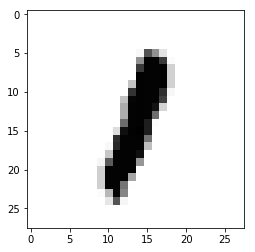

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# MNIST Dataset 가져오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# shape = 28 * 28
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

# layer1
W1 = tf.Variable(tf.random_normal([784, 100]), name='weight1')
b1 = tf.Variable(tf.random_normal([100]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2
W2 = tf.Variable(tf.random_normal([100, 100]), name='weight2')
b2 = tf.Variable(tf.random_normal([100]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

# layer3
W3 = tf.Variable(tf.random_normal([100, 100]), name='weight3')
b3 = tf.Variable(tf.random_normal([100]), name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

# hypothesis
W4 = tf.Variable(tf.random_normal([100, nb_classes]), name='weight4')
b4 = tf.Variable(tf.random_normal([nb_classes]), name='bias4')
hypothesis = tf.nn.softmax(tf.matmul(layer3, W4) + b4)

# cost
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# measure
predicted = tf.argmax(hypothesis, 1)
is_correct = tf.equal(predicted, tf.argmax(Y, 1)) # 에측값이 참이면 True, 아니면 False
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# batch로 작업
training_epochs = 15 # 전체 데이터 셋을 모두 한번씩 학습시키는 것을 1 epoch이라고 한다
batch_size = 100 # 한번에 읽어들일 사이즈

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost= 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c/total_batch
        print('Epoch: ', epoch+1, 'cost: ', avg_cost)
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # image
    r = random.randint(0, mnist.test.num_examples -1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r: r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()